There comes multiple challenges that comes along with the data. There are many errors that needs correction as a part of the wrangling process to make it usable for the analysis. Syntactic, semantic and missing values play a huge role in the data. The data is considered error free when these errors are solved. Syntactic errors are the ones that are the outlines or format errors that represent the structure. Semantic errors owe to the errors in the logic that can lead to mistakes in the output. There can be a huge size of data and it is not mandatory that all the values should be present. There is a possibility of the values to be missing. One solution for this is to remove the missing values, but removing them can lead to loss of data which we cannot afford losing. To solve these, errors Exploratory Data Analysis and wrangling is done to achieve the desired usable data. This assignment will walk us through the required EDA to get an error free data. 

There are four datasets that are given for this assignment - dirty_data, outlier_data, missing_data and countries.

In [293]:
from google.colab import drive

In [294]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing all the required libraries for the wrangling -  
Pandas, Numpy, matplotlib, sklearn, dateutil, seaborn.

In [295]:

#importing all the required libraries
import pandas as pd
import numpy as np
import re
import warnings
from matplotlib import pyplot as plt
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
%matplotlib inline
warnings.filterwarnings("ignore")
import seaborn as sns

Reading the required datasets which are 

*   dirty_data.csv
*   outlier_data.csv
*   missing_data.csv
*   countries.csv






In [296]:
#Reading the data from the input files
dirty_data =  pd.read_csv("/content/drive/Shareddrives/FIT5196-s1-2022/A2/input_data/32263546_dirty.csv")
outlier_data = pd.read_csv("/content/drive/Shareddrives/FIT5196-s1-2022/A2/input_data/32263546_outlier.csv")
missing_data = pd.read_csv("/content/drive/Shareddrives/FIT5196-s1-2022/A2/input_data/32263546_missing.csv")
country_data = pd.read_csv("/content/drive/Shareddrives/FIT5196-s1-2022/A2/countries.csv")

#**Dirty data - Exploratory data analysis**

To get the basic information about the dataset, we have used "**.columns**", "**.shape**", "**.nunique**", "**.isna().sum()**".
 

*  .columns gives all the variable names of the given dataset.
*   .shape gives the size of the dataframe in terms of rows and columns.
*   .nunique() gives the number of unique values in each column.
*   .isna().sum() gives the total number of NA values in each column.
*   .dtypes to give the datatype of each column in the dataset.
By doing al these, we get a basic idea of the structure of the dataset, if it has any NA values, number of unique values in the dataset. 

In [297]:
dirty_data.columns

Index(['ticket_id', 'airline_flight', 'name', 'gender', 'dob', 'dop', 'dod',
       'is_adult', 'from', 'to', 'distance', 'num_stops', 'has_loyalty',
       'price_tier', 'price'],
      dtype='object')

In [298]:
dirty_data.shape

(500, 15)

In [299]:
dirty_data.nunique()

ticket_id         500
airline_flight    455
name              498
gender              5
dob               490
dop               281
dod               342
is_adult            2
from              216
to                219
distance          493
num_stops           3
has_loyalty         2
price_tier          3
price             500
dtype: int64

In [300]:
dirty_data.isna().sum()

ticket_id         0
airline_flight    0
name              0
gender            0
dob               0
dop               0
dod               0
is_adult          0
from              0
to                0
distance          0
num_stops         0
has_loyalty       0
price_tier        0
price             0
dtype: int64

In [301]:
dirty_data.dtypes

ticket_id          object
airline_flight     object
name               object
gender             object
dob                object
dop                object
dod                object
is_adult            int64
from               object
to                 object
distance          float64
num_stops           int64
has_loyalty         int64
price_tier          int64
price             float64
dtype: object

By the above done exploration, we know that there is not any missing values in the dirty_data.csv file and we know the number of unique values, and datatypes of each column in the dataset. The next step is to check for the errors in the data entry. 
In the given document, the column  airline_flight has a string denoting airline_name\airline_short_form–flight_number.

In [302]:

#using re to split the name of the flight 
def name(n):
  return str(n).split("\\")[0]
def short(sh):
  return str(sh).split("\\")[1].split("-")[0]
def number(num):
  return str(num).split("\\")[1].split("-")[1]

#adding flight name, short form, number to a dataframe and getting the unique values of the flight names and short form
df = pd.DataFrame()
df["airline_flight"] = dirty_data["airline_flight"]
df["airline_name"] = dirty_data["airline_flight"].apply(name)
df["airline_short_form"] = dirty_data["airline_flight"].apply(short)
df["flight_number"] = dirty_data["airline_flight"].apply(number)
print(df["airline_name"].unique())
print(df["airline_short_form"].unique())

['Calisto' 'Omega' 'Adonis']
['CS' 'OG' 'AS' 'as' 'cs']


Using regular expression, I have separated the flight name, short form and the number. I have created a dataframe where I have fed the separated the name, short form and flight number. On seeing the unique values in the airline_name, and airline_short_form, we have the names and short forms. We realise that the short form of the flight name are both in capital case and small case. To rectify the error, a dictionary is used and the correct abbreviation for the airline_short_form is used to rectify the flight_name\short_form variable. 

In [303]:
flight_name = {"Calisto": "CS", 
               "Omega" : "OG", 
               "Adonis" : "AS"}
          

#correcting the short forms for the names
def correction(flight):
  correct_name = re.split(r'\\|\-', flight)
  correct_abbreviation = flight_name[correct_name[0]]
  return correct_name[0] + "\\" + correct_abbreviation + "-" + correct_name[2]


dirty_data["airline_flight"] = dirty_data["airline_flight"].apply(correction)
#print(df["airline_flight"].unique())

By this, the airline_flight column errors are corrected. On moving to the next column for possible errors, the name column cannot have possible errors because, it can only be spelling errors which cannot be rectified as the names are different. Now on checking the next column - gender for its unique values, the gender column has the values "M", "male", "F", "f", and "m" which signify "Male" and "Female". To rectify this, I have converted all the values to either "M" or "F" and applied this to the dataset. By this, we have the gender column rectified for the possible errors. 

In [304]:
print(dirty_data["gender"].unique())

['M' 'male' 'F' 'f' 'm']


In [305]:

#correcting the gender into only "M" and "F" and applying it to the dataset
def gender(gen):
  if "m" in gen.lower():
    return "M"
  elif "f" in gen.lower():
    return "F"

dirty_data["gender"] = dirty_data["gender"].apply(gender)
print(dirty_data["gender"].unique())

['M' 'F']


By this, we have only two genders which are "M" or "F". 
The next step is to make sure the columns:
"dob" - the date of birth of the traveller
"dop" - the date of the ticket purchased
"dod" - the date of the departure
are in the same date format - "YYYY-MM-DD".

In [306]:
#date formatting with required format
def clean_date(dat):
  try:
    return pd.to_datetime(dat).strftime('%Y-%m-%d')
  except:
    return pd.to_datetime(dat, format = "%Y-%d-%m").strftime('%Y-%m-%d')

#applying it to the dataframe
dirty_data["dob"] = dirty_data["dob"].apply(clean_date)
dirty_data["dop"] = dirty_data["dop"].apply(clean_date)
dirty_data["dod"] = dirty_data["dod"].apply(clean_date)

Using the pandas function ".to_datetime(), we convert the date of the columns and then convert it to a string using the "strftime()" to the required format which is "%Y-%m-%d". By this, we have the columns - dob, dop, and dod in the required format.

The next step is to find if there are any errors in the distance column. The distance column has the arc distance between two countries. To find the arc distance, we can use the latitude and longitude position of the countries from the countries dataset and check for the errors.
The distance is found using the Haversine formula using the latitude and longitude from the countries.csv file. 

In [307]:
#finding the distance betweeen the countries to calculate the price
for i in range(len(dirty_data)):
  from_latitude = radians(country_data[country_data["name"] == dirty_data["from"][i]]["latitude"].iloc[0])
  from_longitude = radians(country_data[country_data["name"] == dirty_data["from"][i]]["longitude"].iloc[0])
  to_latitude = radians(country_data[country_data["name"] == dirty_data["to"][i]]["latitude"].iloc[0])
  to_longitude = radians(country_data[country_data["name"] == dirty_data["to"][i]]["longitude"].iloc[0])

  dis_lon = to_longitude - from_longitude
  dis_lat = to_latitude - from_latitude

  d = 2*asin(sqrt(sin(dis_lat / 2)**2 + cos(from_latitude) * cos(to_latitude) *sin(dis_lon / 2)**2))
  earth_radius = 6378
  calc_distance = round(earth_radius * d, 2)

  
  if(dirty_data["distance"][i] != calc_distance):
    dirty_data.at[i, "distance"] = calc_distance

The found distance has ben rounded to two decimal places for approximity. By this, the errors in the distance column are rectified. 
The next step is to check for the has_loyalty column. This column consists of flags which is either 0 or 1. 1 signifies that the person has loyalty program membership and the 0 signifies that the person does not have loyalty program membership.

In [308]:
dirty_data["has_loyalty"].unique()

array([1, 0])

The next step is to retrieve the price_tier values for the decision tree which can be 1, 2 or 3 based on which the tickets are priced. To check if there are no other values except for 1, 2 and 3, The unique values of the "price_tier column are retrieved using the .unique() function. 

In [309]:
print(dirty_data["price_tier"].unique())

[2 1 3]


For the decision tree, the following constraints are checked:
dpbd = difference in the number of days between the dop and dod. 
 

1.  If the dpbd >= 180, the next step is to check if the travel is during the weekend or now. Weekends here are Saturdays and Sundays.
  

*   If the travel is during the weekends, the the price_tier is set to 2.
*   If the travel is during the weekdays (Monday -Friday), then the price_tier is set to 1.

2.   If the dpbd is less than 180, it is checked if it is less that 60 days. 
*   If the dpbd is less than or equal to 60 and the day of travel is is in the weekends, then the price_tier is set to 3
*   If the dpbd is less than or equal to 60 and the day of travel is is not during the weekends, then the price_tier is set to 2.
*   If the dpbd not greater or equal to 180 days and not less or equal to 60 days, then the price_tier is set to 2.


To achieve this decision tree, we have to check for the weekends and weekdays. If the travel is during the weekends, then I have returned the flag 1, else 0. Based on this, the decision tree is developed to set the price tiers.

In [310]:

def dayflag(day):
  if(day in ["Saturday", "Sunday"]):
    return 1
  else:
    return 0
#decision tree for the price
df = pd.DataFrame()
df = dirty_data[["ticket_id", "dop", "dod", "price_tier"]]
df["dod"] = pd.to_datetime(df["dod"])
df["dop"] = pd.to_datetime(df["dop"])
df["dpbd"] = (df["dod"] - df["dop"]).dt.days
df["dod_day"] = df["dod"].dt.day_name()
df["dod_day_flag"] = df["dod_day"].apply(dayflag)
df["calc_price_tier"] = ""

for i in range(len(df["dpbd"])):
  if(df["dpbd"][i] >= 180):
    if(df["dod_day_flag"][i] == 1):
      df["calc_price_tier"][i] = 2
    else:
      df["calc_price_tier"][i] = 1
  else:
    if(df["dpbd"][i] <= 60):
      if(df["dod_day_flag"][i] == 1):
        df["calc_price_tier"][i] = 3
      else:
        df["calc_price_tier"][i] = 2
    else:
      df["calc_price_tier"][i] = 2

df = df[df["price_tier"] != df["calc_price_tier"]]
df = df.reset_index(drop = True)

for i in range(len(df)):
  dirty_data.loc[dirty_data["ticket_id"] == df["ticket_id"][i], "price_tier"] = df["calc_price_tier"][i]





The price_tier column errors are rectified and fed into the calc_price_tier column. The calc_price_tier contains the error free and correct price_tier data.  

Once all the errors are solved in the dirty_data, it is written into a new csv file called the dirty_data_solution.csv. By this, the dirty_data is explored. 

In [311]:
dirty_data.to_csv("/content/drive/MyDrive/dw_assignment2_output/32263546_dirty_solution.csv", index = False)

#**Missing data - Exploratory Data Analysis**

It is clearly given that there are no errors in the missing_data except for the missing values. For the EDA of the mssing_data, it is important to understand the structure, the datatypes, and the number of missing values in each column.


*   .shape gives the number of rows and columns of the dataset.
*   .columns gives all the names of the columns in the dataset.
*   .isna().sum() gives the number of all the NA values in each column.
*   .dropna for dropping the rows or columns with the missing values.





In [312]:
missing_data.shape


(500, 15)

The size of the data is 500 rows and 15 columns

In [313]:
#column names in the data
missing_data.columns

Index(['ticket_id', 'airline_flight', 'name', 'gender', 'dob', 'dop', 'dod',
       'is_adult', 'from', 'to', 'distance', 'num_stops', 'has_loyalty',
       'price_tier', 'price'],
      dtype='object')

In [314]:
missing_data.isna().sum()


ticket_id           0
airline_flight      0
name                0
gender              0
dob                 0
dop                 0
dod                 0
is_adult            0
from                0
to                  0
distance            0
num_stops           0
has_loyalty         0
price_tier          0
price             150
dtype: int64

By this, it is evident that there are 150 missing values in the "price" column of the dataset which makes only 350 not null values and 150 NA values in the data. 

In [315]:
#shape of the files
missing_notnull = missing_data.copy()
missing_notnull.dropna(subset = ["price"], inplace = True)
print(missing_notnull.shape)
print(missing_data.shape)

(350, 15)
(500, 15)


Now on creating a dataset that has only the not null values of the columns "price_tier", "distance", "num_stops", "is_adult", "price", We are calculating the interaction ("price_tier*distance") which is the product of the "price_tier" and the "distance".  Based on this, we are plotting a graph between the interaction and the price 

In [316]:
df = missing_notnull[["price_tier", "distance", "num_stops", "is_adult", "price"]]
df["price_tier*distance"] = df["price_tier"] * df["distance"]

To compare the interaction and the price, a scatterplot has been plotted using the matplotlib library. The X-axis has the price_tier*distance (i.e interaction) and the Y-axis has the price. 

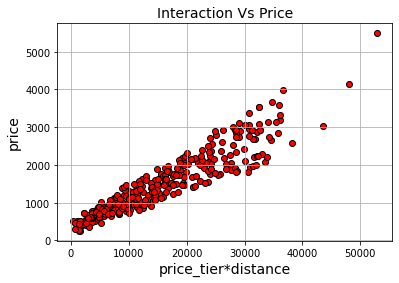

In [317]:
#interaction vc price using matplotlib
plt.scatter(df["price_tier*distance"], df["price"], color = "red", edgecolor = "black")
plt.title("Interaction Vs Price", fontsize = 14)
plt.xlabel("price_tier*distance", fontsize = 14)
plt.ylabel("price", fontsize = 14)
plt.grid(True)
plt.show()

From the above graph, it is clear that as the interaction rate increases, the price also increases correspondingly. 

To show the relationship between the number of stops and the price, A bar graph has been plotted using the matplotlib library. The X-axis has the number of stops which is 0,1 and 2 and the Y axis shows the average price. 

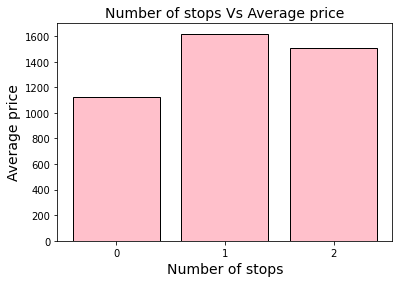

In [318]:
#Number of stops Vs Average price using matplotlib
stops_df = df.groupby(["num_stops"], as_index = False)["price"].mean()
plt.bar(stops_df["num_stops"], stops_df["price"], color = "pink", edgecolor = "black")
plt.title("Number of stops Vs Average price", fontsize = 14)
plt.xlabel("Number of stops", fontsize = 14)
plt.ylabel("Average price", fontsize = 14)
plt.xticks([0,1,2])
plt.show()

From the above graph plotted, it is clear that the average price is highest for 1 stop and lowest for 0 stops. 
To compare the prices for adults, a bar plot has been plotted. The X-axis represents the adults which has the values - 
0 = Not an adult
1 = Adult.
Y-axis has the average price of the tickets

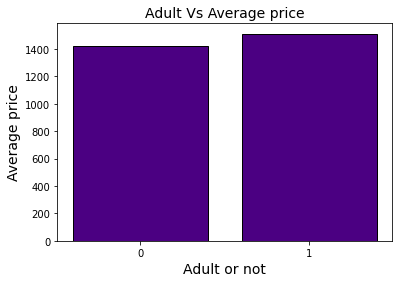

In [319]:
#Adult Vs Average price using matplotlib
adult_df = df.groupby(["is_adult"], as_index = False)["price"].mean()
plt.bar(adult_df["is_adult"], adult_df["price"], color = "indigo", edgecolor = "black")
plt.title("Adult Vs Average price", fontsize = 14)
plt.xlabel("Adult or not", fontsize = 14)
plt.ylabel("Average price", fontsize = 14)
plt.xticks([0,1])
plt.show()

From the above graph, the cost of the adults are higher than the average price for the non-adult passengers. 


For calculating the price of the ticket, a linear model is plotted depending on the factors - "price_tier", "distance", "num_stops", "is_adult", "price". 
A dataframe lr_data is created that contains the not null values with the columns - "price_tier", "distance", "num_stops", "is_adult", "price".
The interaction between price_tier and distance is calculated by multiplying the price_tier and distance. 
The dataset is then split into 15% as test data and 85% as training data. A linear regression model with the above mentioned factors using the .LinearRegression() function is used and the training data is fit into the model. Moreover, the score for the test data and train data is printed to see how efficient the model is. 

In [320]:
#regression models

from sklearn.metrics import mean_absolute_error
from math import sqrt



airlines = list(set(missing_data["airline_flight"].str.split("\\").str[0]))

for airline in airlines:
  lr_data = missing_notnull[missing_notnull["airline_flight"].str.contains(airline)][["price_tier", "distance", "num_stops", "is_adult", "price"]]
  lr_data["price_tier*distance"] = lr_data["price_tier"]*lr_data["distance"]
  x = lr_data.drop(columns = ["price"])
  y= lr_data["price"]
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 0)
  reg = linear_model.LinearRegression()
  reg.fit(x_train, y_train)
  print(airline)
  print(reg.score(x_test, y_test))
  print(reg.score(x_train, y_train))
  

  airline_data = missing_data[missing_data["airline_flight"].str.contains(airline) & missing_data["price"].isnull()]
  airline_data = airline_data.reset_index(drop = True)
  for i in range(len(airline_data)):
    if(airline_data["has_loyalty"][i] == 1):
      missing_data.loc[missing_data["ticket_id"] == airline_data["ticket_id"][i], "price"] = reg.predict([[airline_data["price_tier"][i], airline_data["distance"][i], airline_data["price_tier"][i] * airline_data["distance"][i], airline_data["num_stops"][i], airline_data["is_adult"][i]]])[0]*0.9
      
    else:
      missing_data.loc[missing_data["ticket_id"] == airline_data["ticket_id"][i], "price"] = reg.predict([[airline_data["price_tier"][i], airline_data["distance"][i], airline_data["price_tier"][i] * airline_data["distance"][i], airline_data["num_stops"][i], airline_data["is_adult"][i]]])[0]
      

Calisto
0.9853867576156248
0.9883036722796417
Adonis
0.9885915356295167
0.9885830135450935
Omega
0.9836316539428955
0.9852241491222332


Once the linear regression is employed to find the price, the discount of 10% is given to the people who have loyalty membership. The next step is to check if there are still any NA values in the "price" column. By checking the shape, it is clear that all the missing values have been imputed and there are no more missing values in the dataset. 

In [321]:
missing_data.isna().sum()

ticket_id         0
airline_flight    0
name              0
gender            0
dob               0
dop               0
dod               0
is_adult          0
from              0
to                0
distance          0
num_stops         0
has_loyalty       0
price_tier        0
price             0
dtype: int64

In [322]:
missing_data.shape

(500, 15)

Once this is achieved, the dataset is output is written into a csv file. All the errors within the missing_data are rectified.  

In [323]:
missing_data.to_csv("/content/drive/MyDrive/dw_assignment2_output/32263546_missing_solution.csv", index = False)

#**Outlier data - Exploratory Data Analysis**

For the EDA of the outlier data, the shape, missing values are checked. Once that is done, we have described the data using the describe(). By this, we have the basic structure of the dataset. Since there are no errors in the outliers file, all we have to check is for the outliers and rectify them. 

In [324]:
outlier_data.shape

(500, 15)

In [325]:
outlier_data.columns

Index(['ticket_id', 'airline_flight', 'name', 'gender', 'dob', 'dop', 'dod',
       'is_adult', 'from', 'to', 'distance', 'num_stops', 'has_loyalty',
       'price_tier', 'price'],
      dtype='object')

In [326]:
outlier_data.isna().sum()

ticket_id         0
airline_flight    0
name              0
gender            0
dob               0
dop               0
dod               0
is_adult          0
from              0
to                0
distance          0
num_stops         0
has_loyalty       0
price_tier        0
price             0
dtype: int64

In [327]:
outlier_data.describe()

,is_adult,distance,num_stops,has_loyalty,price_tier,price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.618000,8747.403760,1.184000,0.482000,1.648000,1441.765270
std,0.486363,4528.947657,0.776757,0.500176,0.562787,757.230902
min,0.000000,456.500000,0.000000,0.000000,1.000000,202.140000
25%,0.000000,5244.082500,1.000000,0.000000,1.000000,824.817500
50%,1.000000,8453.375000,1.000000,0.000000,2.000000,1280.715000
75%,1.000000,12055.837500,2.000000,1.000000,2.000000,1901.637500
max,1.000000,19798.130000,2.000000,1.000000,3.000000,4711.480000


To identify the outliers, a boxplot has been plotted to check for the outliers in the price column of the outlier_data. 

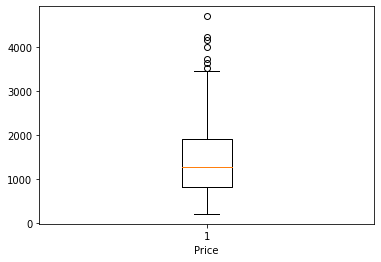

In [328]:
plt.boxplot(outlier_data["price"])
plt.xlabel("Price")
plt.show()

From the above plot, it is evident that there are outliers in the given data. To rectify it, I have used dist_plot to find the IQR for the price column.

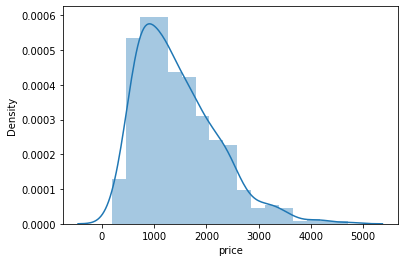

In [329]:
sns.distplot(outlier_data["price"])

From the above plot, it is clear that between the range 4000-5000 in the axis, we can see the outliers in the data. To rectify it, IQR (Inter-Quartile Range)is found. IQR is found using the formula
IQ = Q3 - Q1 
where Q3 is the 75th percentile and Q1 is the 25th percentile. Using this the upper hinge and lower hinge is found where the data lies.

In [330]:
Q1 = outlier_data["price"].quantile(0.25)
Q3 = outlier_data["price"].quantile(0.75)
IQR = Q3 - Q1
lower_hinge = Q1 - 1.5*IQR
upper_hinge = Q3 + 1.5*IQR
IQR, lower_hinge, upper_hinge

(1076.8200000000002, -790.4125000000003, 3516.8675000000003)

The data that does not lie between the upper hinge and the lower hinge are the outlers of the data. From the below given snippet of the code, 493 values lie between the upper and the lower hingewhich means that 7 values are considered to be outliers in the data. 

In [331]:
outlier_data = outlier_data[(outlier_data["price"] < upper_hinge) & (outlier_data["price"] > lower_hinge)]
outlier_data.shape

(493, 15)

On plotting ony the data that lies between the upper and lower hinge (omitting the outliers) a distplot is plotted using the seaborn library. 

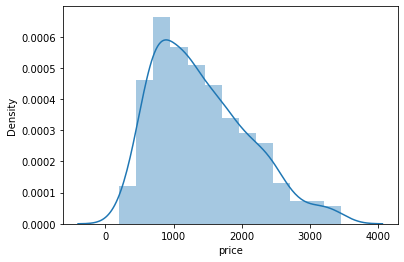

In [332]:
sns.distplot(outlier_data["price"])

From the above graph, it is clear that the outliers (assume after 3500) on the X-axis are no longer visible. This proves that the outliers are removed. To showcase this, a boxplot is used.

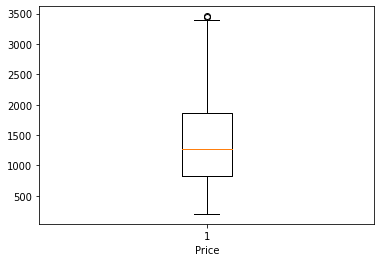

In [333]:
plt.boxplot(outlier_data["price"])
plt.xlabel("Price")
plt.show()

Once this is done, the data is written into a file named outlier_solution that contains data without any outliers. 

In [334]:
outlier_data.to_csv("/content/drive/MyDrive/dw_assignment2_output/32263546_outlier_solution.csv", index = False)

Thus EDA for the dirty_data, missing_data and the outlier_data is done and we have a clean data that can be further used for further analysis purposes. 

#References
Tutorial solutions of week 6,7,8
*   Matplotlib — Visualization with Python. (2022). Retrieved 9 May 2022, from https://matplotlib.org/
*   Multiple Linear Regression using Python. (2022). Retrieved 9 May 2022, from https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/
*   Program for distance between two points on earth - GeeksforGeeks. (2022). Retrieved 9 May 2022, from https://www.geeksforgeeks.org/program-distance-two-points-earth/
*   seaborn: statistical data visualization — seaborn 0.11.2 documentation. (2022). Retrieved 9 May 2022, from https://seaborn.pydata.org/



